In [1]:
# Examine all the data we currently have
import pandas as pd

original_df = pd.read_csv("../../data/311.csv")
cleaned_311_df = pd.read_csv("../../data/cleaned_311.csv")
svi_df = pd.read_csv("../../data/Climate_Ready_Boston_Social_Vulnerability.csv")
modified_lighter_df = pd.read_csv("../../data/modified_lighter_311.csv")
modified_dates_df = pd.read_csv("../../../../PBI Script/modified_dates_311.csv")
cleaned_311_df_v2 = pd.read_csv("../../data/311_cleaned_v2.csv")

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_88800\2553479681.py:4: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv("../../data/311.csv")
C:\Users\kmfoc\AppData\Local\Temp\ipykernel_88800\2553479681.py:9: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_311_df_v2 = pd.read_csv("../../data/311_cleaned_v2.csv")


In [2]:
# Get the all the unique column names
original_columns = original_df.columns
cleaned_311_columns = cleaned_311_df.columns
svi_columns = svi_df.columns
modified_lighter_columns = modified_lighter_df.columns
modified_dates_columns = modified_dates_df.columns
cleaned_311_v2_columns = cleaned_311_df_v2.columns

In [3]:
# Create a set of all the unique column names
original_columns_set = set(original_columns)
cleaned_311_columns_set = set(cleaned_311_columns)
svi_columns_set = set(svi_columns)
modified_lighter_columns_set = set(modified_lighter_columns)
modified_dates_columns_set = set(modified_dates_columns)
cleaned_311_v2_columns_set = set(cleaned_311_v2_columns)

# Aggregate all the unique column names
all_columns_set = original_columns_set.union(cleaned_311_columns_set)
all_columns_set = all_columns_set.union(svi_columns_set)
all_columns_set = all_columns_set.union(modified_lighter_columns_set)
all_columns_set = all_columns_set.union(modified_dates_columns_set)
all_columns_set = all_columns_set.union(cleaned_311_v2_columns_set)

# printlength of each set
print("Original columns: ", len(original_columns_set))
print("Cleaned 311 columns: ", len(cleaned_311_columns_set))
print("SVI columns: ", len(svi_columns_set))
print("Modified lighter columns: ", len(modified_lighter_columns_set))
print("Modified dates columns: ", len(modified_dates_columns_set))
print("Cleaned 311 v2 columns: ", len(cleaned_311_v2_columns_set))
print("All columns: ", len(all_columns_set))

Original columns:  30
Cleaned 311 columns:  26
SVI columns:  16
Modified lighter columns:  26
Modified dates columns:  34
Cleaned 311 v2 columns:  32
All columns:  55


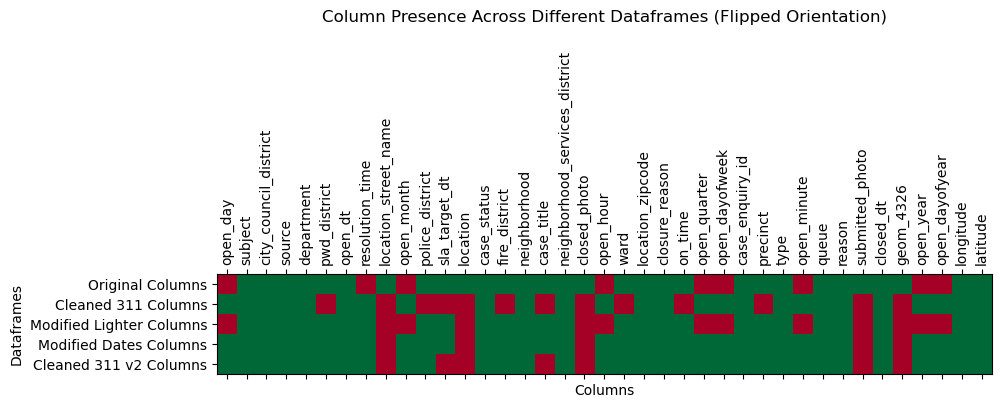

In [5]:
import matplotlib.pyplot as plt
import numpy as np

dataframes = {
    "Original Columns": original_columns_set,
    "Cleaned 311 Columns": cleaned_311_columns_set,
    "Modified Lighter Columns": modified_lighter_columns_set,
    "Modified Dates Columns": modified_dates_columns_set,
    "Cleaned 311 v2 Columns": cleaned_311_v2_columns_set,
}

# Getting all unique column names
all_columns = set().union(*dataframes.values())

# Creating a grid for presence of columns in each dataframe
column_presence_grid = {column: [column in dataframes[df] for df in dataframes] for column in all_columns}

# Converting the grid to a numpy array for easy plotting
grid_array = np.array(list(column_presence_grid.values()))

# Re-creating the grid for the flipped orientation
flipped_grid_array = grid_array.T  # Transposing the original grid array

# Plotting the flipped grid
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(flipped_grid_array, cmap='RdYlGn')

# Setting axis labels for the flipped orientation
ax.set_yticks(np.arange(len(dataframes)))
ax.set_xticks(np.arange(len(all_columns)))
ax.set_yticklabels(dataframes.keys())
ax.set_xticklabels(all_columns, rotation=90)

plt.title("Column Presence Across Different Dataframes (Flipped Orientation)", pad=20)
plt.ylabel("Dataframes")
plt.xlabel("Columns")

plt.show()